In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/rohitsahoo/sales-forecasting/train.csv


# All Imports

In [2]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# 1. Data Understanding 

In [4]:
df = pd.read_csv('/kaggle/input/datasets/rohitsahoo/sales-forecasting/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7166,7167,CA-2015-117464,22/07/2015,24/07/2015,Second Class,NP-18325,Naresj Patel,Consumer,United States,San Francisco,California,94122.0,West,OFF-AR-10003190,Office Supplies,Art,Newell 32,11.520
4124,4125,CA-2015-127523,11/05/2015,18/05/2015,Standard Class,BG-11695,Brooke Gillingham,Corporate,United States,Watertown,New York,13601.0,East,OFF-AP-10004249,Office Supplies,Appliances,Staple holder,35.910
8637,8638,CA-2018-151281,27/04/2018,02/05/2018,Standard Class,HM-14980,Henry MacAllister,Consumer,United States,Seattle,Washington,98105.0,West,FUR-FU-10000397,Furniture,Furnishings,Luxo Economy Swing Arm Lamp,139.580
8050,8051,CA-2015-144974,26/09/2015,30/09/2015,Standard Class,CM-12715,Craig Molinari,Corporate,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,21.184
7462,7463,CA-2016-138485,27/02/2016,01/03/2016,Second Class,NP-18670,Nora Paige,Consumer,United States,Seattle,Washington,98105.0,West,TEC-AC-10002076,Technology,Accessories,Microsoft Natural Keyboard Elite,538.920


In [6]:
df.shape

(9800, 18)

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [11]:
df['Country'].value_counts()  # There is only one country

Country
United States    9800
Name: count, dtype: int64

In [12]:
df['City'].value_counts()

City
New York City        891
Los Angeles          728
Philadelphia         532
San Francisco        500
Seattle              426
                    ... 
Hagerstown             1
Arlington Heights      1
East Orange            1
San Luis Obispo        1
Springdale             1
Name: count, Length: 529, dtype: int64

In [13]:
df['State'].value_counts()

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 41
Nevada  

In [14]:
df['Region'].value_counts()

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

In [15]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

In [16]:
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [17]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [18]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [22]:
pd.crosstab(df["Sub-Category"], df["Region"])

Region,Central,East,South,West
Sub-Category,,,,
Accessories,174,201,125,254
Appliances,122,122,81,133
Art,175,224,140,245
Binders,362,427,241,462
Bookcases,49,69,28,79
Chairs,151,166,86,203
Copiers,16,20,7,23
Envelopes,58,69,54,66
Fasteners,53,61,29,71


In [23]:
df.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


# 2. EDA

# A. Sales Analysis 

* Charts Section

1. Year-wise Sales Trend

2. Month-wise Sales Trend

3. Region Performance

4. Top 10 States

5. Category Contribution

6. Sub-Category Ranking

## Total Revenue Analysis
* Overall Sales

In [24]:
total_sales = df['Sales'].sum()
print(total_sales)

2252607.4127


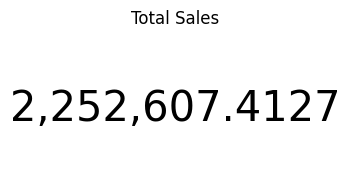

In [25]:
fig, ax = plt.subplots(figsize=(4,2))
ax.text(0.5, 0.5, f"{total_sales:,}", fontsize=30, ha='center', va='center')
ax.set_title("Total Sales")
ax.axis("off")
plt.show()


### Year-wise Trend

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Year'] = df['Order Date'].dt.year
year_sales = df.groupby('Year')['Sales'].sum()

In [27]:
year_sales

Year
2015    479856.2081
2016    454315.9054
2017    597225.4900
2018    721209.8092
Name: Sales, dtype: float64

In [28]:
year_sales.pct_change() * 100

Year
2015          NaN
2016    -5.322491
2017    31.455994
2018    20.760051
Name: Sales, dtype: float64

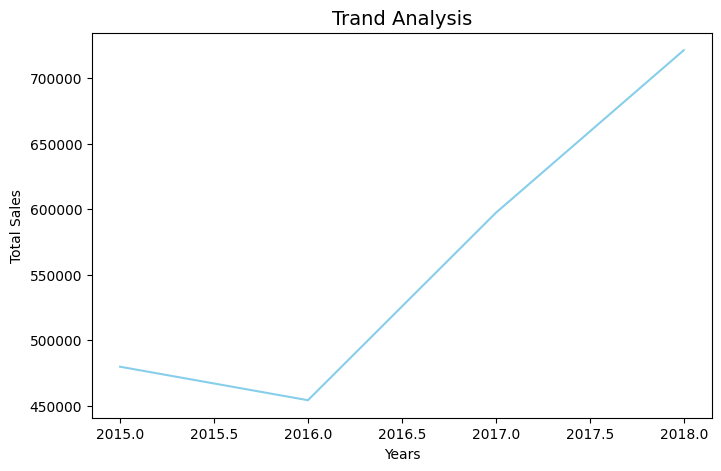

In [29]:
year_sales.plot(kind='line',figsize=(8,5),color='skyblue')

plt.title('Trand Analysis',fontsize=14)
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.show()

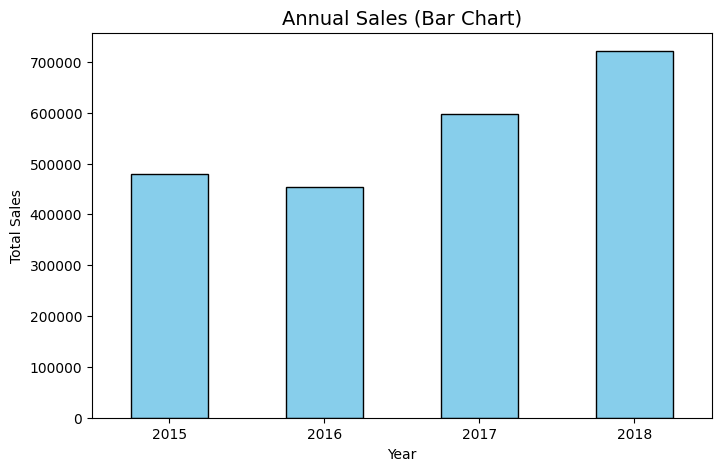

In [30]:
# year_sales is already a Series
year_sales.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')

plt.title("Annual Sales (Bar Chart)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)   # years ko straight dikhane ke liye
plt.show()

#### Growth after 2016 continuously increasing. However, in 2016, a loss was detected in sales.

### Month-wise Trend

In [31]:
df['Month'] = df['Order Date'].dt.to_period('M')
Monthly_sales = df.groupby('Month')['Sales'].sum()

In [32]:
Monthly_sales

Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     70129.2995
2016-12     74543.6012
2017-01     16870.1810
2017-02     22978.8150
2017-03     51165.0590
2017-04     37385.0170
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     42839.2940
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040
2018-

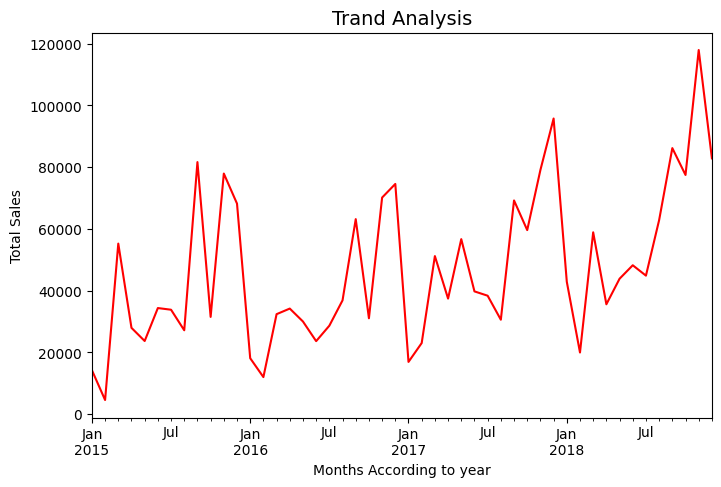

In [33]:
Monthly_sales.plot(kind='line',figsize=(8,5),color='red')

plt.title('Trand Analysis',fontsize=14)
plt.xlabel('Months According to year')
plt.ylabel('Total Sales')
plt.show()

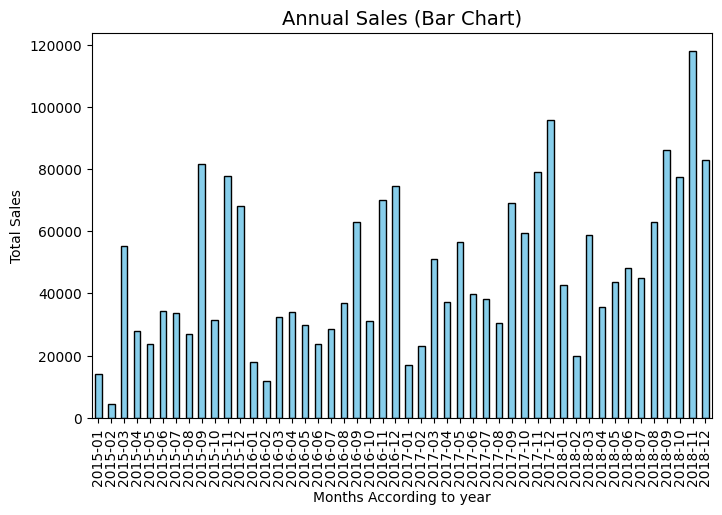

In [34]:
# year_sales is already a Series
Monthly_sales.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')

plt.title("Annual Sales (Bar Chart)", fontsize=14)
plt.xlabel("Months According to year")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)   # years ko straight dikhane ke liye
plt.show()

#### Mostly, high revenue comes from the end of the year.
* November–December sales high → holiday effect

## Region-Wise Revenue 

In [35]:
df['Region'].value_counts()

Region
West       3140
East       2774
Central    2277
South      1598
Name: count, dtype: int64

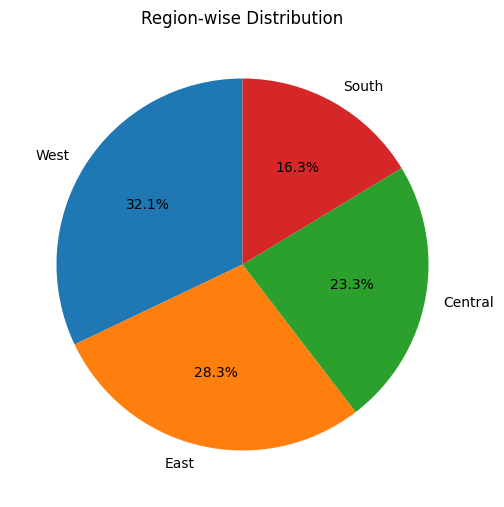

In [36]:
df['Region'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(6,10),startangle=90)
plt.ylabel('')
plt.title("Region-wise Distribution")
plt.show()

In [37]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

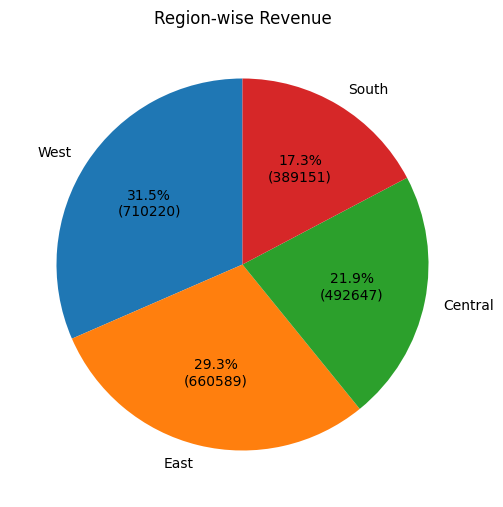

In [38]:
region_sales.plot(kind='pie',autopct=lambda p: f'{p:.1f}%\n({p*region_sales.sum()/100:.0f})',figsize=(6,10),startangle=90)
plt.ylabel('')
plt.title("Region-wise Revenue")
plt.show()

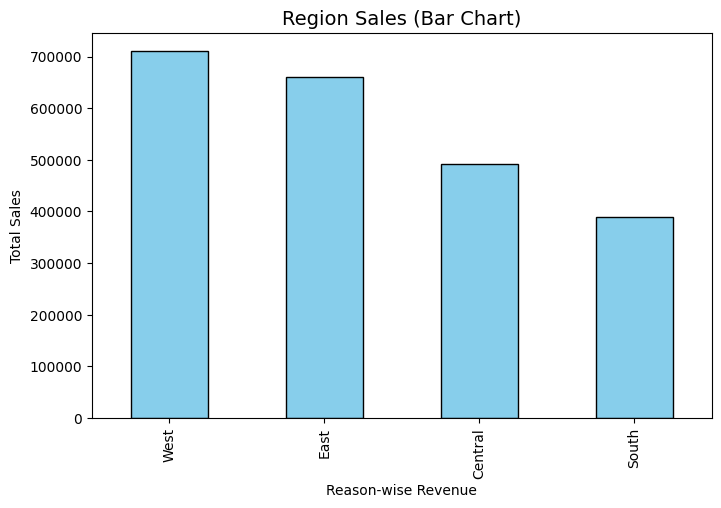

In [39]:
# year_sales is already a Series
region_sales.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')

plt.title("Region Sales (Bar Chart)", fontsize=14)
plt.xlabel("Reason-wise Revenue")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)   # years ko straight dikhane ke liye
plt.show()

## State & City Analysis

### Top Revenue States

In [40]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(state_sales)
top_10_states = state_sales.head(10)

State
California              446306.4635
New York                306361.1470
Texas                   168572.5322
Washington              135206.8500
Pennsylvania            116276.6500
Florida                  88436.5320
Illinois                 79236.5170
Michigan                 76136.0740
Ohio                     75130.3500
Virginia                 70636.7200
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48219.1100
Kentucky                 36458.3900
Arizona                  35272.6570
New Jersey               34610.9720
Colorado                 31841.5980
Wisconsin                31173.4300
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27322.9990
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

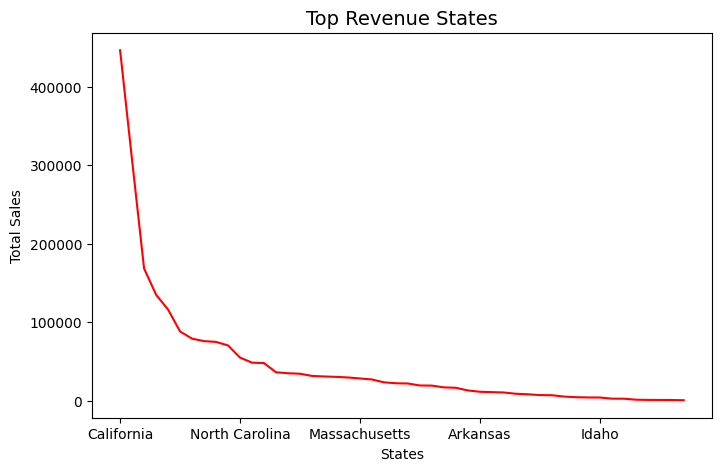

In [41]:
state_sales.plot(kind='line',figsize=(8,5),color='red')

plt.title('Top Revenue States',fontsize=14)
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.show()

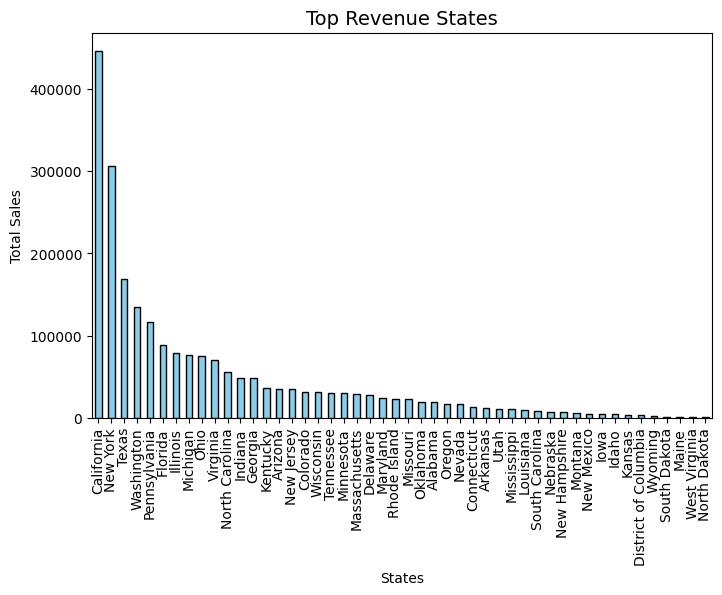

In [42]:
state_sales.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')

plt.title('Top Revenue States',fontsize=14)
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.xticks(rotation=90) 
plt.show()

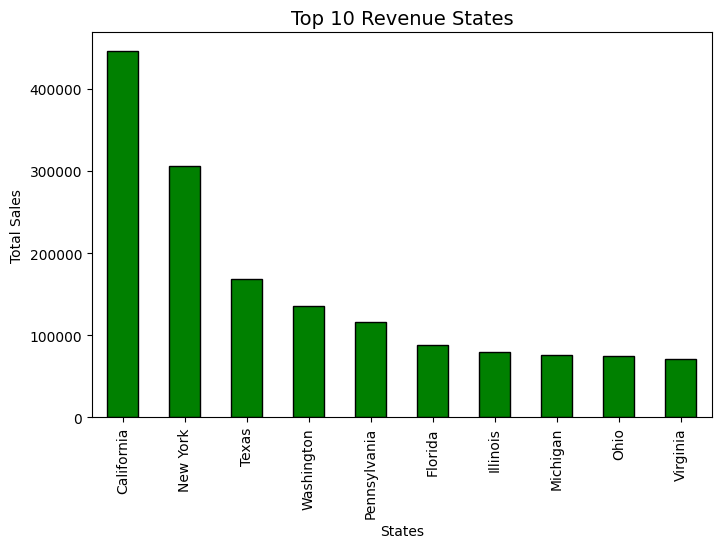

In [43]:
top_10_states.plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title('Top 10 Revenue States',fontsize=14)
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.xticks(rotation=90) 
plt.show()

### City Analysis

In [44]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales
top_10_city = city_sales.head(10)

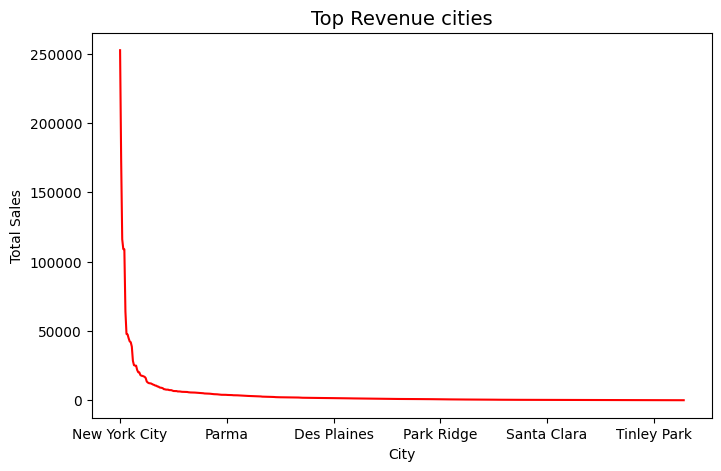

In [45]:
city_sales.plot(kind='line',figsize=(8,5),color='red')

plt.title('Top Revenue cities',fontsize=14)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

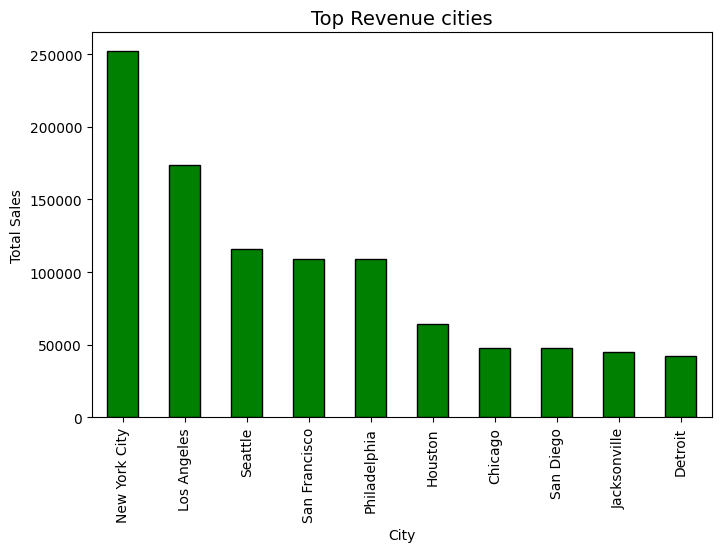

In [46]:
top_10_city.plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title('Top Revenue cities',fontsize=14)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90) 
plt.show()

In [47]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
2773,2774,CA-2017-131576,2017-11-22,26/11/2017,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Detroit,Michigan,48205.0,Central,OFF-BI-10002852,Office Supplies,Binders,Ibico Standard Transparent Covers,49.44,2017,2017-11


## Category & Sub-Category Analysis

### Category-wise Revenue

In [48]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales

Category
Furniture          723538.4757
Office Supplies    703212.8240
Technology         825856.1130
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Category-wise Revenue')

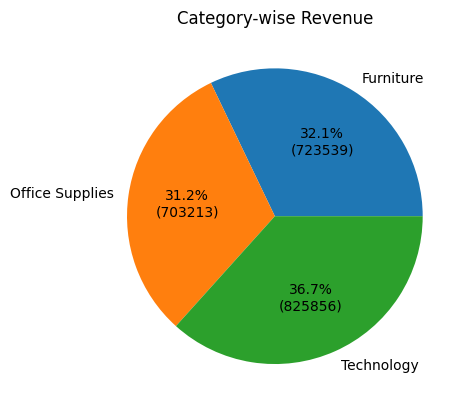

In [49]:
category_sales.plot(kind='pie',autopct=lambda p: f'{p:.1f}%\n({p*region_sales.sum()/100:.0f})')
plt.ylabel('')
plt.title('Category-wise Revenue')

### Sub-Category Analysis

In [50]:
sub_cat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
sub_cat_sales 

Sub-Category
Phones         326487.6980
Chairs         322107.5310
Storage        217779.1020
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    163881.6900
Copiers        146248.0940
Bookcases      109408.2987
Appliances     104075.4630
Furnishings     89212.0180
Paper           76736.1040
Supplies        46420.3080
Art             26697.3700
Envelopes       16126.0060
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64

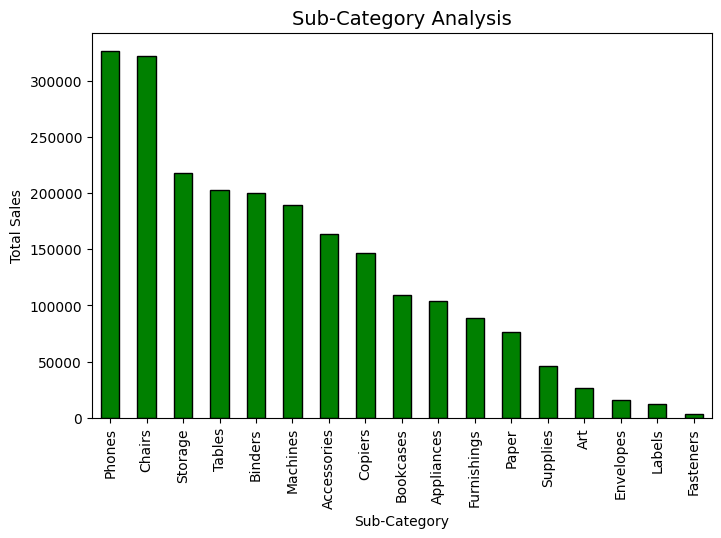

In [51]:
sub_cat_sales .plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title('Sub-Category Analysis',fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90) 
plt.show()

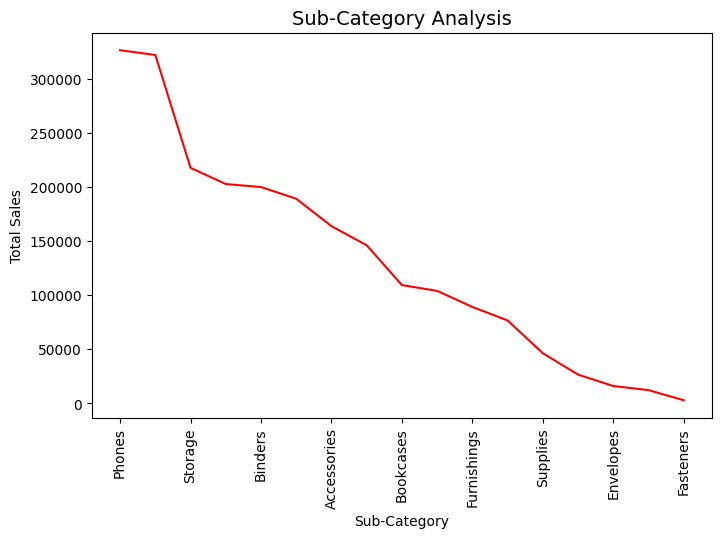

In [52]:
sub_cat_sales.plot(kind='line',figsize=(8,5),color='red')

plt.title('Sub-Category Analysis',fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90) 
plt.show()

## Avarage Order Value

In [53]:
total_orders = df['Order ID'].nunique()
avg_order_values = total_sales / total_orders
print('Average Order Value: ',avg_order_values)

Average Order Value:  458.2195713384866


## Sales Distribution

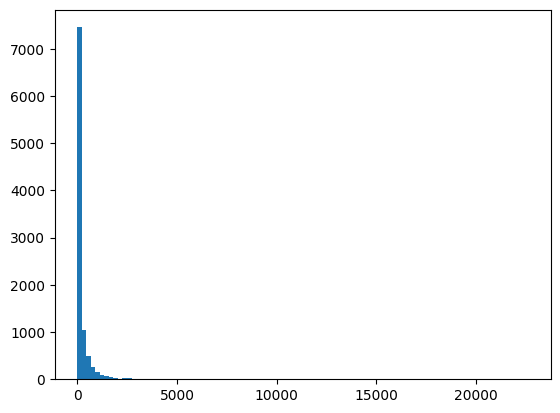

In [54]:
plt.hist(df['Sales'],bins=100)
plt.show()

# B. Customer Analysis

In [55]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
7640,7641,CA-2018-104885,2018-03-02,08/03/2018,Standard Class,DB-13555,Dorothy Badders,Corporate,United States,Newark,Delaware,19711.0,East,OFF-PA-10002764,Office Supplies,Paper,Easy-staple paper,68.04,2018,2018-03


In [56]:
df['Segment'].value_counts()

Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64

In [57]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales

Segment
Consumer       1.146708e+06
Corporate      6.822118e+05
Home Office    4.236874e+05
Name: Sales, dtype: float64

In [58]:
total_sales = df['Sales'].sum()
segment_percent = (segment_sales / total_sales) * 100
segment_percent

Segment
Consumer       50.905815
Corporate      30.285430
Home Office    18.808756
Name: Sales, dtype: float64

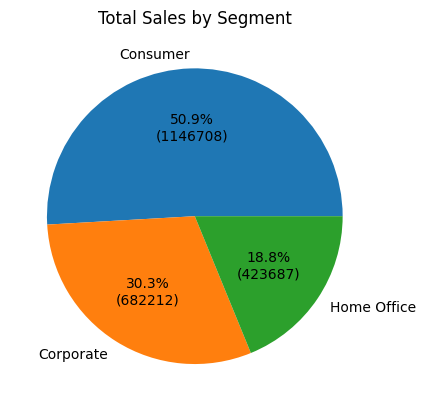

In [59]:
segment_percent.plot(kind='pie',autopct=lambda p: f'{p:.1f}%\n({p*region_sales.sum()/100:.0f})')
plt.title('Total Sales by Segment')
plt.ylabel('')
plt.show()

* Consumer Highest

1. Business mainly B2C focused hai
2. Marketing campaigns individual buyers ke liye effective hain

In [60]:
Segment_Order = df.groupby('Segment')['Order ID'].nunique()
avg_segment_order = segment_sales / Segment_Order
avg_segment_order

Segment
Consumer       452.350355
Corporate      458.475695
Home Office    474.454005
dtype: float64

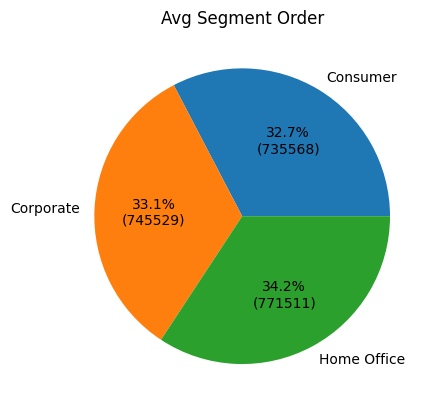

In [61]:
avg_segment_order.plot(kind='pie',autopct=lambda p: f'{p:.1f}%\n({p*region_sales.sum()/100:.0f})')
plt.title('Avg Segment Order')
plt.ylabel('')
plt.show()

In [62]:
# Repeat Customers Analysis
# 1. Order per Customer
customer_orders = df.groupby('Customer ID')['Order ID'].nunique()
repeat_customers = customer_orders[customer_orders > 1]
repeat_percentage = (len(repeat_customers) / len(customer_orders)) * 100

In [63]:
repeat_customers = repeat_customers.value_counts()

In [64]:
repeat_percentage

98.36065573770492

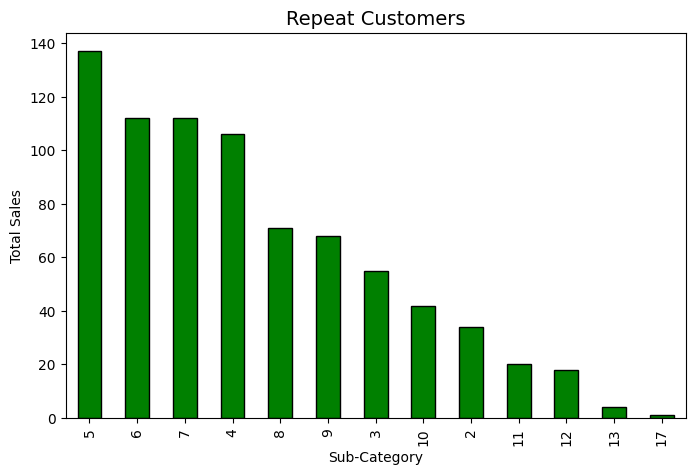

In [65]:
repeat_customers.plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title('Repeat Customers',fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90) 
plt.show()